In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv("foodhub_order.csv")

In [3]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [16]:
print("\nUnique values in 'rating':", df["rating"].unique())
print("Unique values in 'day_of_the_week':", df["day_of_the_week"].unique())


Unique values in 'rating': ['Not given' '5' '3' '4']
Unique values in 'day_of_the_week': ['Weekend' 'Weekday']


In [19]:
df["rating"] = df["rating"].replace("not given", np.nan)
df["rating"] = pd.to_numeric(df["rating"], errors='coerce')

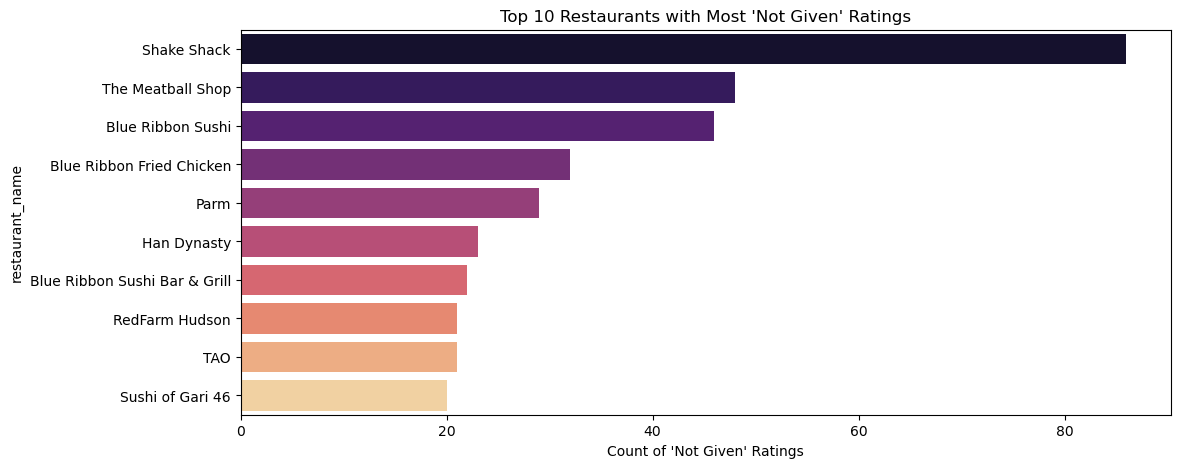

In [30]:
not_given_ratings = df[df["rating"].isna()]
restaurant_missing_ratings = not_given_ratings["restaurant_name"].value_counts().head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=restaurant_missing_ratings.values, y=restaurant_missing_ratings.index, palette="magma")
plt.title("Top 10 Restaurants with Most 'Not Given' Ratings")
plt.xlabel("Count of 'Not Given' Ratings")
plt.show()

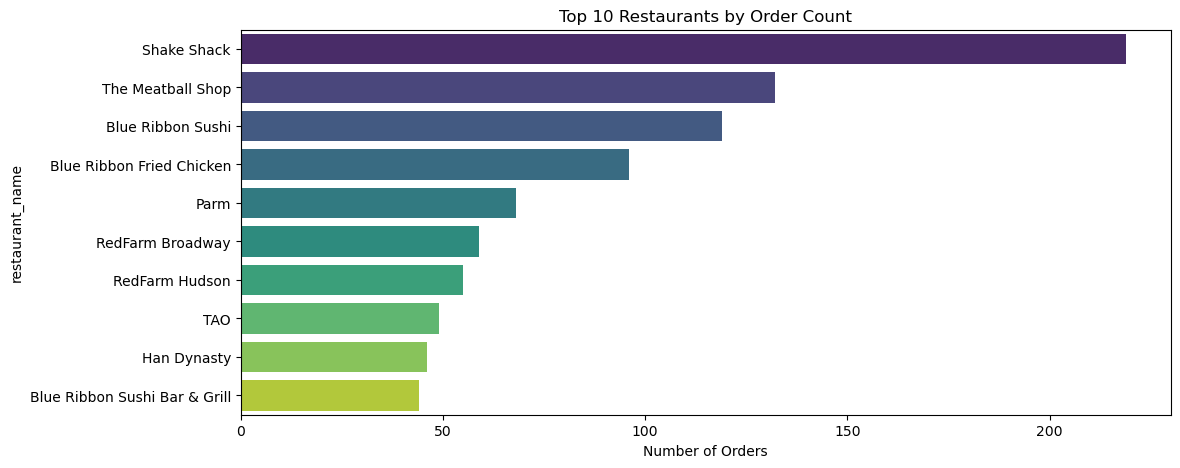

In [18]:
plt.figure(figsize=(12, 5))
top_restaurants = df["restaurant_name"].value_counts().head(10)
sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette="viridis")
plt.title("Top 10 Restaurants by Order Count")
plt.xlabel("Number of Orders")
plt.show()

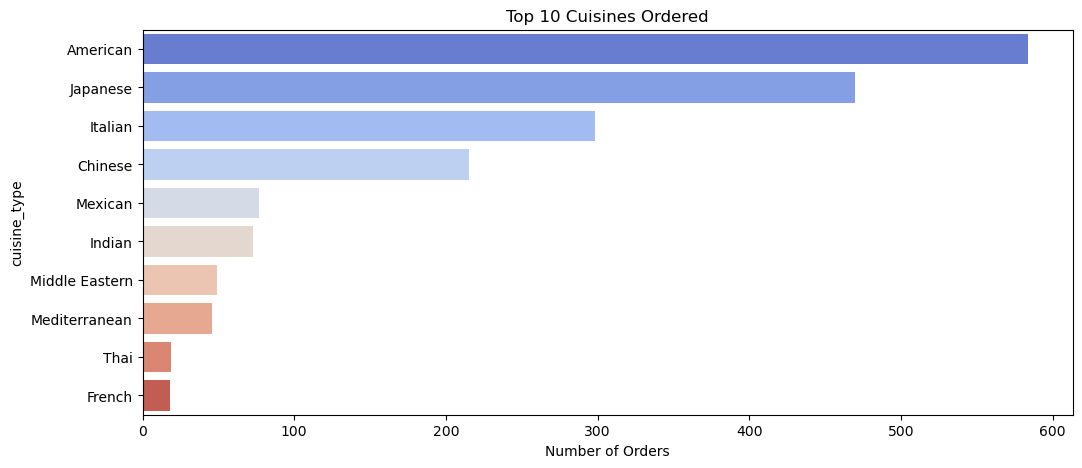

In [20]:
plt.figure(figsize=(12, 5))
top_cuisines = df["cuisine_type"].value_counts().head(10)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="coolwarm")
plt.title("Top 10 Cuisines Ordered")
plt.xlabel("Number of Orders")
plt.show()

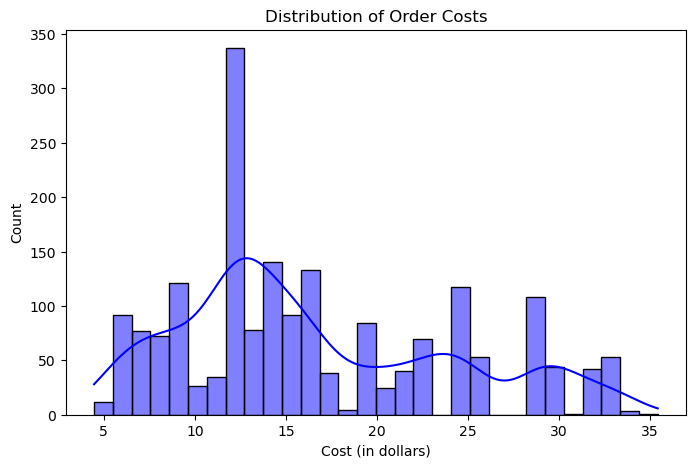

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df["cost_of_the_order"], bins=30, kde=True, color="blue")
plt.title("Distribution of Order Costs")
plt.xlabel("Cost (in dollars)")
plt.show()

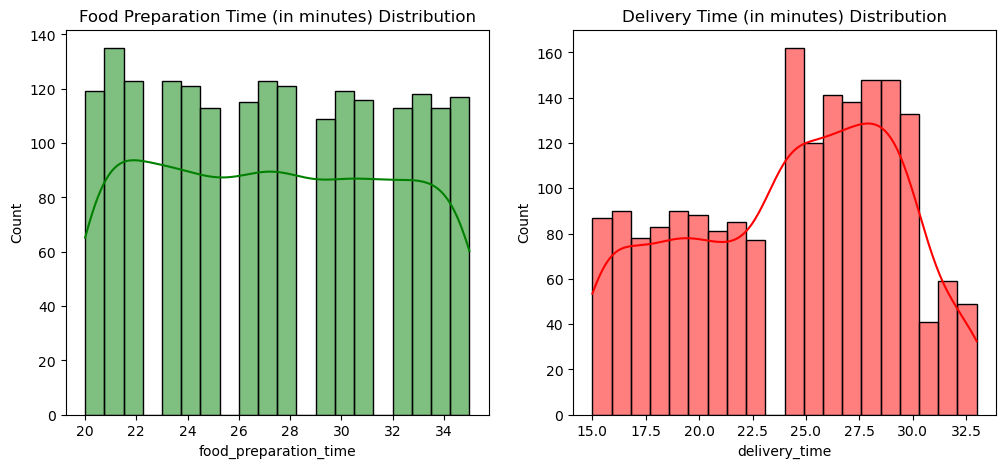

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["food_preparation_time"], bins=20, kde=True, color="green", ax=ax[0])
ax[0].set_title("Food Preparation Time (in minutes) Distribution")
sns.histplot(df["delivery_time"], bins=20, kde=True, color="red", ax=ax[1])
ax[1].set_title("Delivery Time (in minutes) Distribution")
plt.show()

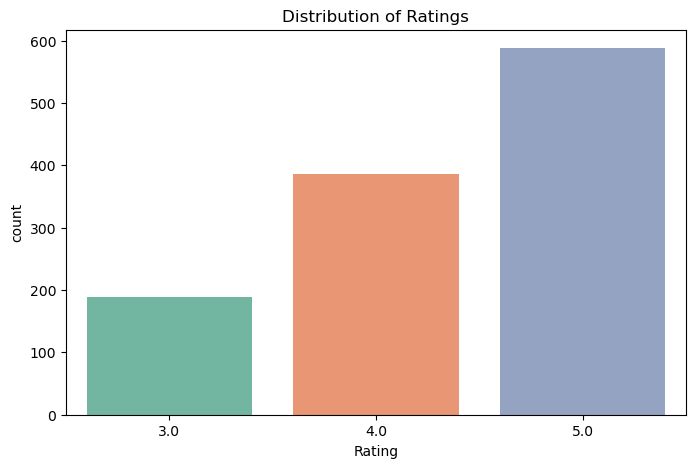

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["rating"], palette="Set2")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.show()

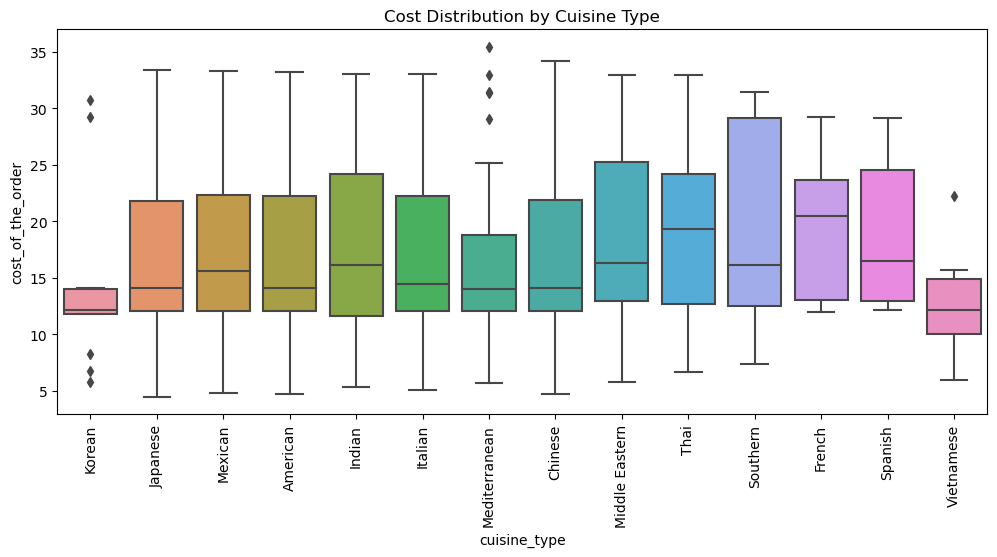

In [35]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="cuisine_type", y="cost_of_the_order", data=df)
plt.xticks(rotation=90)
plt.title("Cost Distribution by Cuisine Type")
plt.show()

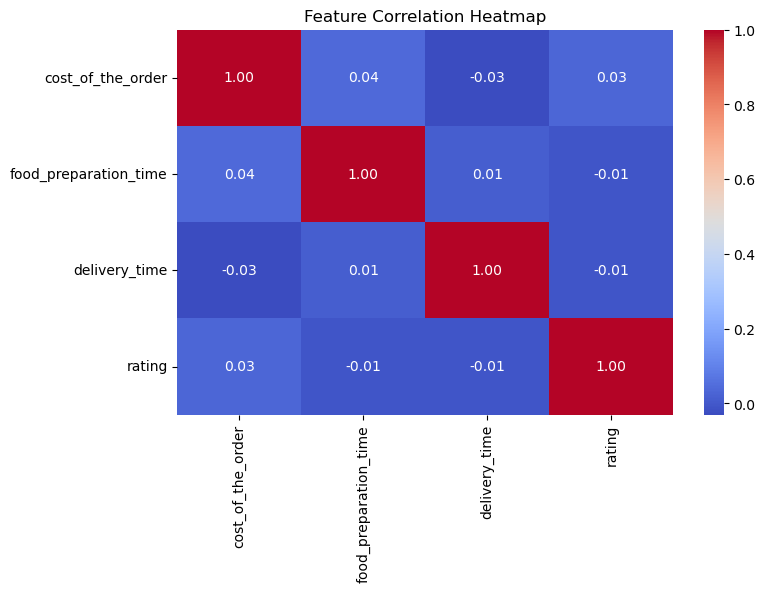

In [40]:
plt.figure(figsize=(8, 5))
corr = df[["cost_of_the_order", "food_preparation_time", "delivery_time", "rating"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()